In [1]:
# Load the "autoreload" extension
%load_ext autoreload

# always reload modules marked with "%aimport"
%autoreload 2

import os
import sys

# add the 'src' directory as one where we can import modules
src_dir = os.path.join(os.getcwd(), os.pardir, 'src')
sys.path.append(src_dir)

In [2]:
import torch
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn')

In [4]:
# plt.scatter(torch.Tensor(1, 10).normal_().numpy()[0])
# plt.show()

In [6]:
def gaussian(x, mu, sigma):
    return 1 / np.sqrt(2 * np.pi * sigma**2) * np.exp(- (x - mu)**2 / (2 * sigma**2))

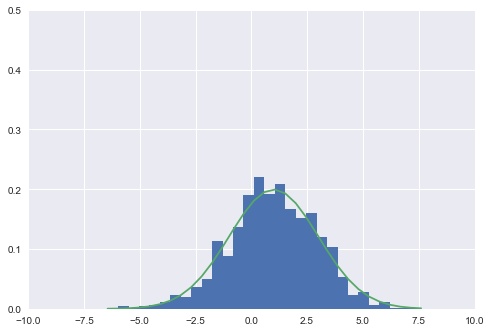

In [8]:
plt.figure()
mu, sigma = 1.0, 2
samples = np.random.normal(mu, sigma, 1000)
count, bins, ignored = plt.hist(samples, 30, normed=True)
plt.axis([-10, 10, 0, .5])
plt.plot(bins, gaussian(bins, mu, sigma))
# plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
#          np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
#           linewidth=2, color='r')
plt.show()

In [110]:
# def kld(p, q):
#     return 0.5 * np.sum()

def kl_divergence(mu=0, sigma=1):
#     return -0.5 * np.sum(1 + sigma - np.square(mu) - np.exp(sigma), axis=-1)
    return  np.mean(0.5 * np.sum(np.exp(sigma) + mu**2 - 1. - sigma))

In [111]:
kl_divergence(np.array([0.0, 1]), np.array([.5, .5]))

0.64872127070012819

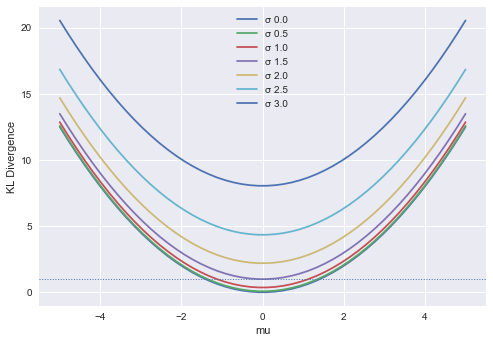

In [112]:
mus = np.linspace(-5, 5)
sigmas = np.linspace(0, 3, 7)

plt.figure()
for s in sigmas:
    plt.plot(mus, [kl_divergence(mu, s) for mu in mus], label='σ {}'.format(s))
    
# plt.plot(mus, )

plt.xlabel('mu')
plt.ylabel('KL Divergence')
plt.axhline(1.0, linewidth=1, linestyle='dotted')
plt.legend()
plt.show()

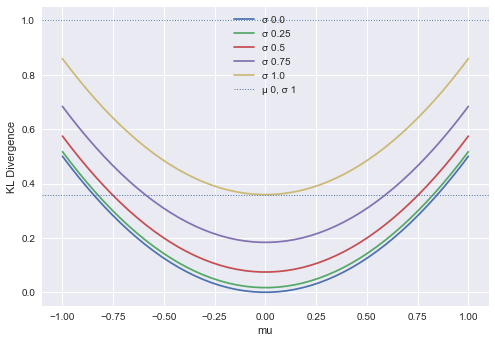

In [113]:
mus = np.linspace(-1, 1)
sigmas = np.linspace(0, 1, 5)

plt.figure()
for s in sigmas:
    plt.plot(mus, [kl_divergence(mu, s) for mu in mus], label='σ {}'.format(s))

plt.axhline(kl_divergence(), linewidth=1, linestyle='dotted', label='μ 0, σ 1') 
    
plt.xlabel('mu')
plt.ylabel('KL Divergence')
plt.legend()
plt.axhline(1.0, linewidth=1, linestyle='dotted')
plt.show()

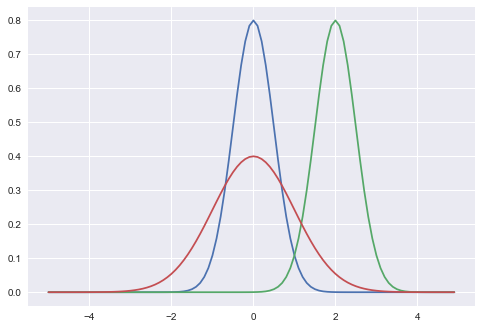

In [35]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

@interact(mu_1=0, sigma_1=0.5,
          mu_2=2, sigma_2=0.5,
          mu_3=0, sigma_3=1)
def g(mu_1, sigma_1, mu_2, sigma_2, mu_3, sigma_3):
    plt.figure()
    x = np.arange(-5, 5, 0.1)
    plt.plot(x, gaussian(x, mu_1, sigma_1))
    plt.plot(x, gaussian(x, mu_2, sigma_2))
    plt.plot(x, gaussian(x, mu_3, sigma_3))
    plt.show()